**Importing data**


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
#list of ETF
tickers= "RELIANCE.NS GAIL.NS BHARTIARTL.NS APOLLOHOSP.NS TATAMOTORS.NS"
df_5tickerclosing = yf.download(tickers, start="2009-01-01", end="2022-12-31")['Adj Close']
df_5tickerclosing.reset_index(inplace=True)
df_5tickerclosing["Date"]=df_5tickerclosing.Date.dt.date


[*********************100%***********************]  5 of 5 completed


In [ ]:
df_5tickerclosing

,Date,APOLLOHOSP.NS,BHARTIARTL.NS,GAIL.NS,RELIANCE.NS,TATAMOTORS.NS
0,2009-01-02,222.669739,303.357056,26.028715,287.016144,32.157669
1,2009-01-05,217.410004,295.072754,26.830950,304.742737,32.596054
2,2009-01-06,215.324631,282.743073,26.436108,305.869385,34.057354
3,2009-01-07,212.196609,279.730560,24.900570,267.906250,31.810604
4,2009-01-09,202.719818,274.953674,25.389437,257.308289,30.276251
...,...,...,...,...,...,...
3403,2022-10-21,4389.049805,797.450012,86.449997,2471.600098,398.049988
3404,2022-10-24,4410.149902,802.099976,86.800003,2479.850098,401.600006
3405,2022-10-25,4404.049805,802.299988,86.550003,2441.550049,404.549988
3406,2022-10-27,4431.850098,817.099976,88.050003,2451.149902,407.700012


In [ ]:
df_5tickerclosing

,Date,APOLLOHOSP.NS,BHARTIARTL.NS,GAIL.NS,RELIANCE.NS,TATAMOTORS.NS
0,2009-01-02,222.669739,303.357056,26.028715,287.016144,32.157669
1,2009-01-05,217.410004,295.072754,26.830950,304.742737,32.596054
2,2009-01-06,215.324631,282.743073,26.436108,305.869385,34.057354
3,2009-01-07,212.196609,279.730560,24.900570,267.906250,31.810604
4,2009-01-09,202.719818,274.953674,25.389437,257.308289,30.276251
...,...,...,...,...,...,...
3403,2022-10-21,4389.049805,797.450012,86.449997,2471.600098,398.049988
3404,2022-10-24,4410.149902,802.099976,86.800003,2479.850098,401.600006
3405,2022-10-25,4404.049805,802.299988,86.550003,2441.550049,404.549988
3406,2022-10-27,4431.850098,817.099976,88.050003,2451.149902,407.700012


In [ ]:
df_5tickerclosing.columns=['Date','APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS']

***Descriptive Data Analysis***

Close price

In [ ]:
import pandas as pd
df_des=pd.DataFrame()

In [ ]:
#meanf
df_des['mean']=df_5tickerclosing.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#standard deviation
df_des['std']=df_5tickerclosing.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#coefficient of variance
df_des['covar']=df_5tickerclosing.std()/df_5tickerclosing.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df_des.round(2)

,mean,std,covar
APOLLOHOSP,1361.58,1157.43,0.85
BHARTIARTL,370.32,132.51,0.36
GAIL,65.59,19.39,0.30
RELIANCE,899.70,700.21,0.78
TATAMOTORS,294.56,140.24,0.48


In [ ]:
for symbol in ['APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS']:
  df_5tickerclosing["previous_{}".format(symbol)] = df_5tickerclosing[symbol].shift(1)
  df_5tickerclosing['return_{}'.format(symbol)] = (df_5tickerclosing[symbol] / df_5tickerclosing["previous_{}".format(symbol)] ) - 1
  df_5tickerclosing['per_return_{}'.format(symbol) ] = df_5tickerclosing['return_{}'.format(symbol)] * 100
  del df_5tickerclosing['return_{}'.format(symbol)]
  df_5tickerclosing.head()

In [ ]:
df_5tickerclosing[[x  for x in list(df_5tickerclosing.columns) if (x.split('_')[-1]!='Date') & ( x.split('_')[0]!='previous')]]

,APOLLOHOSP,BHARTIARTL,GAIL,RELIANCE,TATAMOTORS,per_return_APOLLOHOSP,per_return_BHARTIARTL,per_return_GAIL,per_return_RELIANCE,per_return_TATAMOTORS
0,222.669739,303.357056,26.028715,287.016144,32.157669,NaN,NaN,NaN,NaN,NaN
1,217.410004,295.072754,26.830950,304.742737,32.596054,-2.362124,-2.730875,3.082114,6.176166,1.363236
2,215.324631,282.743073,26.436108,305.869385,34.057354,-0.959189,-4.178522,-1.471592,0.369705,4.483058
3,212.196609,279.730560,24.900570,267.906250,31.810604,-1.452700,-1.065459,-5.808486,-12.411551,-6.596960
4,202.719818,274.953674,25.389437,257.308289,30.276251,-4.466043,-1.707674,1.963276,-3.955847,-4.823402
...,...,...,...,...,...,...,...,...,...,...
3403,4389.049805,797.450012,86.449997,2471.600098,398.049988,1.539614,0.573841,-1.143511,-1.159722,-0.012564
3404,4410.149902,802.099976,86.800003,2479.850098,401.600006,0.480744,0.583104,0.404865,0.333792,0.891852
3405,4404.049805,802.299988,86.550003,2441.550049,404.549988,-0.138320,0.024936,-0.288018,-1.544450,0.734557
3406,4431.850098,817.099976,88.050003,2451.149902,407.700012,0.631244,1.844695,1.733102,0.393187,0.778649


In [ ]:
import numpy as np
import pandas as pd

import plotnine

from plotnine import *
from plotnine import data
from pandas import DataFrame

Return 

In [ ]:
return_df_5tickerclosing=df_5tickerclosing[[x  for x in list(df_5tickerclosing.columns) if ('return' in x.split('_') )]].dropna()

In [ ]:

return_df_5tickerclosing

,per_return_APOLLOHOSP,per_return_BHARTIARTL,per_return_GAIL,per_return_RELIANCE,per_return_TATAMOTORS
1,-2.362124,-2.730875,3.082114,6.176166,1.363236
2,-0.959189,-4.178522,-1.471592,0.369705,4.483058
3,-1.452700,-1.065459,-5.808486,-12.411551,-6.596960
4,-4.466043,-1.707674,1.963276,-3.955847,-4.823402
5,2.948904,-2.355610,1.777322,-4.799467,-2.564114
...,...,...,...,...,...
3403,1.539614,0.573841,-1.143511,-1.159722,-0.012564
3404,0.480744,0.583104,0.404865,0.333792,0.891852
3405,-0.138320,0.024936,-0.288018,-1.544450,0.734557
3406,0.631244,1.844695,1.733102,0.393187,0.778649


In [ ]:
return_df_5tickerclosing.join(df_5tickerclosing['Date'])

,per_return_APOLLOHOSP,per_return_BHARTIARTL,per_return_GAIL,per_return_RELIANCE,per_return_TATAMOTORS,Date
1,-2.362124,-2.730875,3.082114,6.176166,1.363236,2009-01-05
2,-0.959189,-4.178522,-1.471592,0.369705,4.483058,2009-01-06
3,-1.452700,-1.065459,-5.808486,-12.411551,-6.596960,2009-01-07
4,-4.466043,-1.707674,1.963276,-3.955847,-4.823402,2009-01-09
5,2.948904,-2.355610,1.777322,-4.799467,-2.564114,2009-01-12
...,...,...,...,...,...,...
3403,1.539614,0.573841,-1.143511,-1.159722,-0.012564,2022-10-21
3404,0.480744,0.583104,0.404865,0.333792,0.891852,2022-10-24
3405,-0.138320,0.024936,-0.288018,-1.544450,0.734557,2022-10-25
3406,0.631244,1.844695,1.733102,0.393187,0.778649,2022-10-27


In [ ]:
df_des_return=pd.DataFrame()
df_des_return['mean']=pd.DataFrame(return_df_5tickerclosing.mean())

In [ ]:
df_des_return['std']=pd.DataFrame(return_df_5tickerclosing.std())

In [ ]:
df_des_return['covar']=pd.DataFrame(return_df_5tickerclosing.std()/return_df_5tickerclosing.mean())

In [ ]:

df_des_return

,mean,std,covar
per_return_APOLLOHOSP,0.112033,2.167475,19.346824
per_return_BHARTIARTL,0.051650,2.134298,41.322365
per_return_GAIL,0.056213,1.991239,35.423072
per_return_RELIANCE,0.082136,1.917987,23.351324
per_return_TATAMOTORS,0.114029,2.815154,24.687983


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

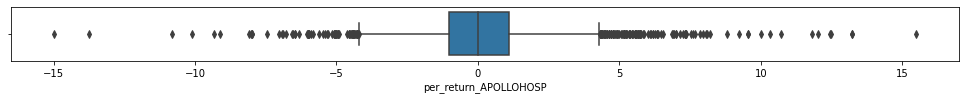

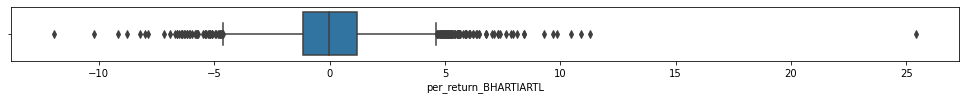

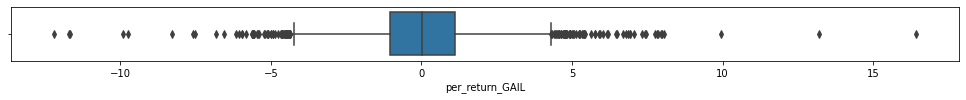

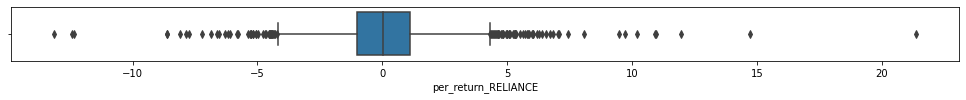

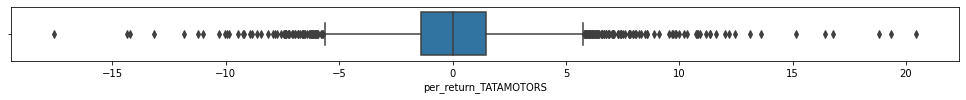

In [ ]:
#df_5tickerclosing
import matplotlib.pyplot as plt
df1=return_df_5tickerclosing.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=return_df_5tickerclosing, x=column)

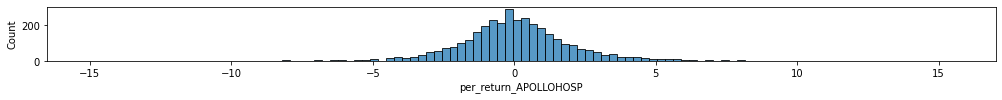

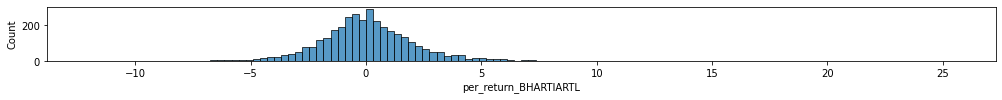

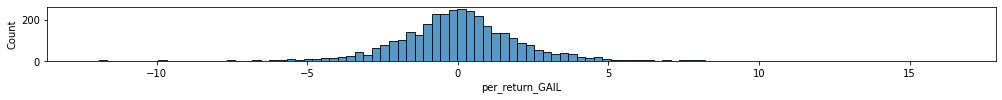

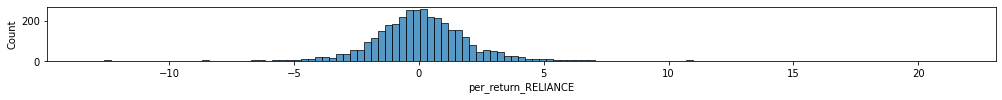

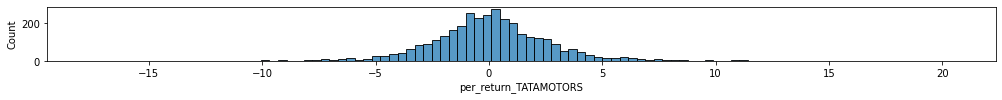

In [ ]:
for column in df1:
  plt.figure(figsize=(17,1))
  sns.histplot(data=return_df_5tickerclosing, x=column)

Normal P plot

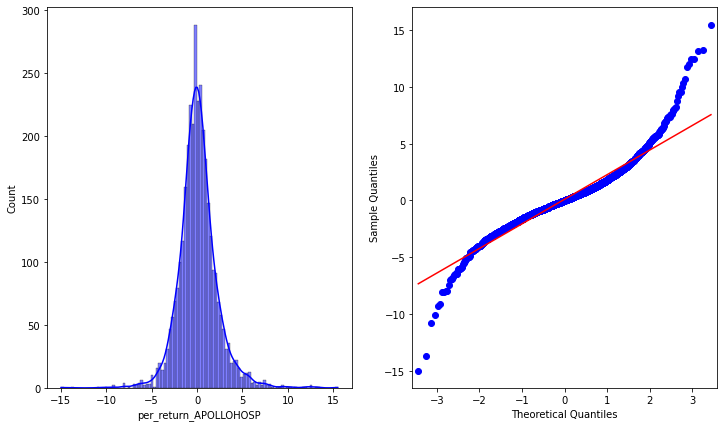

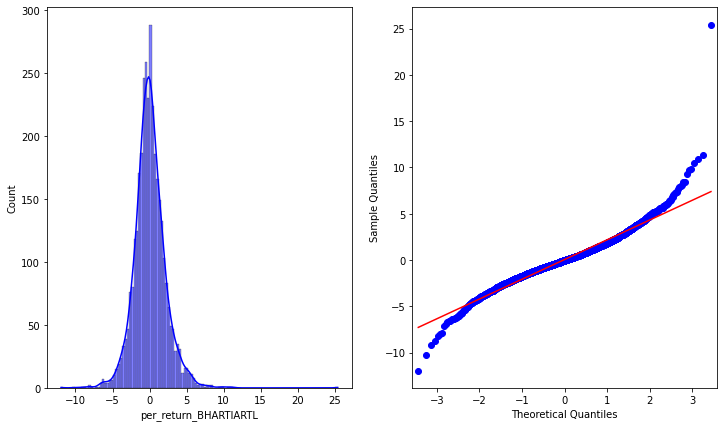

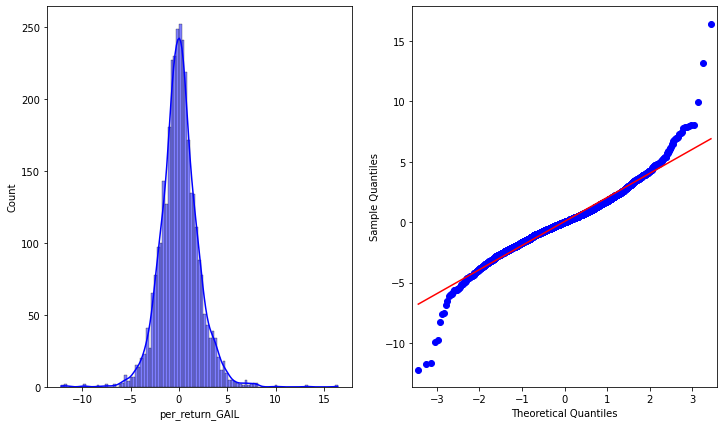

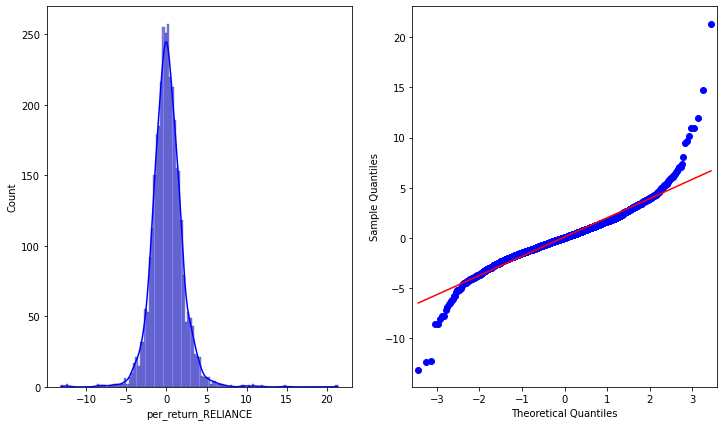

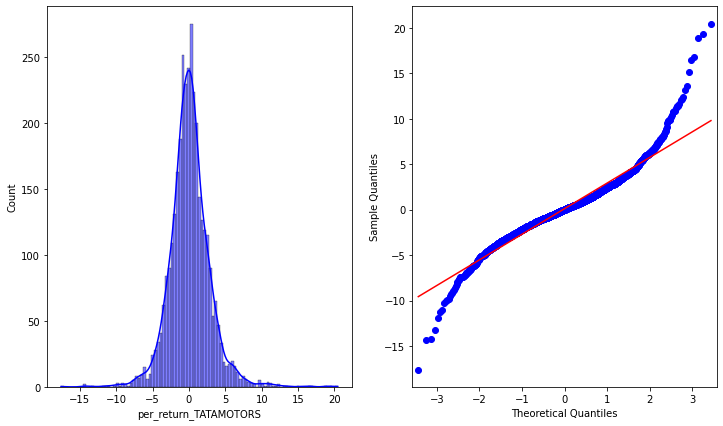

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
  

# plots for standard distribution
for col in list(return_df_5tickerclosing.columns):
  fig, ax = plt.subplots(1, 2, figsize=(12, 7))
  sns.histplot(return_df_5tickerclosing[col],kde=True, color ='blue',ax=ax[0])
  sm.ProbPlot(return_df_5tickerclosing[col]).qqplot(line='s', ax=ax[1])
  


Moving Average

In [ ]:
def bollinger_band(symbol, df,n,m):
  TP=df[['Date',symbol]].sort_values('Date').reset_index(drop=True)
  data=TP[symbol]
  #.dropna()
  B_MA=pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA_{}'.format(symbol))

  sigma=(data.rolling(n, min_periods=n).std())#.dropna())
  BU=pd.Series((B_MA+m*sigma), name='BU_{}'.format(symbol))
  BL=pd.Series((B_MA-m*sigma), name='BL_{}'.format(symbol))

  return_df=pd.concat([TP,B_MA,BU,BL],axis=1).dropna()
  return return_df
  #retun_df.columns=[symbol,]

In [ ]:
return_df = return_df_5tickerclosing.join(df_5tickerclosing['Date'])


In [ ]:
import plotly.io as pio
import plotly.graph_objects as go 

import matplotlib.pyplot as plt
n=200
m=2

pio.templates.default="plotly_dark"

for symbol in return_df.columns[:-1]:
  bb=bollinger_band(symbol, return_df, n, m)
  

  fig=go.Figure()

  fig.update_layout(title=symbol)



  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb[symbol],
                          line_color = '#636EFA',
                          name = symbol)),


  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['B_MA_{}'.format(symbol)],
                          line_color = '#FF6692',
                          name = 'sma')),

  # Upper Bound
  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['BU_{}'.format(symbol)],
                          line_color = 'rgba(173,204,255,0.2)',
                           fill = 'tonexty',
                           fillcolor='rgba(173,204,255,0.2)',
                          name = 'upper band',
                          opacity = 0.5)),

  # Lower Bound fill in between with parameter 'fill': 'tonexty'
  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['BL_{}'.format(symbol)],
                          line_color = 'rgba(173,204,255,0.2)',
                            fill = 'tonexty',
                          fillcolor='rgba(173,204,255,0.2)',
                          name = 'lower band',
                          opacity = 0.5))
  
  fig.show()

Momentum Graph

In [ ]:
def momentum(symbol, df,n):
  TP=df[['Date',symbol]].sort_values('Date').reset_index(drop=True)
  df_momentum= pd.concat([TP, TP[symbol].pct_change(n)],axis=1)
  df_momentum.columns=['Date',	'rtrn_{}'.format(symbol.split('_')[-1]),	'Mntm_rtrn_{}'.format(symbol.split('_')[-1])]
  return df_momentum

In [ ]:
df_des_mom=momentum('per_return_GAIL', return_df,14)

In [ ]:
df_des_mom.sort_values('Date',inplace=True)
df_des_mom.replace([np.inf, - np.inf], np.nan, inplace = True)
#df_des_mom.sort_values('Mntm_rtrn_GAIL')

In [ ]:

df_des_mom.dropna()

,Date,rtrn_GAIL,Mntm_rtrn_GAIL
14,2009-01-27,-5.391182,-2.749183
15,2009-01-28,6.679069,-5.538668
16,2009-01-29,-2.111834,-0.636423
17,2009-01-30,1.191715,-0.392996
18,2009-02-02,3.558635,1.002246
...,...,...,...
3402,2022-10-21,-1.143511,-1.854152
3403,2022-10-24,0.404865,-1.185492
3404,2022-10-25,-0.288018,-1.116785
3405,2022-10-27,1.733102,4.040388


In [ ]:
return_df

,per_return_APOLLOHOSP,per_return_BHARTIARTL,per_return_GAIL,per_return_RELIANCE,per_return_TATAMOTORS,Date
1,-2.362124,-2.730875,3.082114,6.176166,1.363236,2009-01-05
2,-0.959189,-4.178522,-1.471592,0.369705,4.483058,2009-01-06
3,-1.452700,-1.065459,-5.808486,-12.411551,-6.596960,2009-01-07
4,-4.466043,-1.707674,1.963276,-3.955847,-4.823402,2009-01-09
5,2.948904,-2.355610,1.777322,-4.799467,-2.564114,2009-01-12
...,...,...,...,...,...,...
3403,1.539614,0.573841,-1.143511,-1.159722,-0.012564,2022-10-21
3404,0.480744,0.583104,0.404865,0.333792,0.891852,2022-10-24
3405,-0.138320,0.024936,-0.288018,-1.544450,0.734557,2022-10-25
3406,0.631244,1.844695,1.733102,0.393187,0.778649,2022-10-27


In [ ]:
import plotly.io as pio
import plotly.graph_objects as go 

import matplotlib.pyplot as plt
n=200
m=2

pio.templates.default="plotly_dark"
return_df.sort_values('Date', inplace=True)
for symbol in return_df.columns[:-1]:
  bb=momentum(symbol, return_df,14)
  bb=bb.replace([np.inf, - np.inf], np.nan)
  bb.dropna(inplace=True)
  
  #print(bb.columns)

  fig=go.Figure()

  fig.update_layout(title=symbol)



  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['Mntm_rtrn_{}'.format(symbol.split('_')[-1])],
                          line_color = '#636EFA',
                          name = 'sma'))
  fig.show()





Relative Strength Index

In [ ]:
!pip install get_all_tickers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for get-all-tickers: filename=get_all_tickers-1.8-py3-none-any.whl size=4248 sha256=c6528b47ab1be35dadf4062cd39b19974e1ef321a5151da3a011a065b22276db
  Stored in directory: /root/.cache/pip/wheels/f0/8d/8f/25b9632788de8771fb8be22529bbe0ba5ae5446f3be65b1ab3
Successfully built get-all-tickers


In [ ]:
# Necessary Libraries
import yfinance as yf, pandas as pd, shutil, os, time, glob
import numpy as np
import requests
from get_all_tickers import get_tickers as gt
from statistics import mean

In [ ]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [ ]:

return_df.columns

Index(['per_return_APOLLOHOSP', 'per_return_BHARTIARTL', 'per_return_GAIL',
       'per_return_RELIANCE', 'per_return_TATAMOTORS', 'Date'],
      dtype='object')

In [ ]:
for symbol in ['APOLLOHOSP',	'BHARTIARTL',	'GAIL',	'RELIANCE',	'TATAMOTORS']:
  if symbol !='Date':
    return_df['RSI_{}'.format(symbol)]=computeRSI(return_df['per_return_{}'.format(symbol)], 250)
  
    pio.templates.default="plotly_dark"
    fig=go.Figure()

    fig.update_layout(title='RSI_{}'.format(symbol))
    fig.add_trace(go.Scatter(x = return_df['Date'],
                          y = return_df['per_return_{}'.format(symbol)],
                          line_color = '#636EFA',
                        name = 'sma') )
    fig.show()



Sensitivity analysis using Beta Index

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# symbols = [stock, market]
# start date for historical prices

def calulate_beta(symbol):
  
  data = yf.download([symbol,'^NSEI'], start="2009-01-01", end="2022-12-31")['Adj Close'] 
  # Convert historical stock prices to daily percent change
  price_change = data.pct_change()
  # Deletes row one containing the NaN
  df = price_change.drop(price_change.index[0])
  # Create arrays for x and y variables in the regression model 
  # Set up the model and define the type of regression
  x = np.array(df[symbol]).reshape((-1,1))
  y = np.array(df['^NSEI'])
  model = LinearRegression().fit(x, y)  
  print('Beta = ', model.coef_)

In [ ]:
symbols = ['APOLLOHOSP.NS',	'BHARTIARTL.NS',	'GAIL.NS',	'RELIANCE.NS',	'TATAMOTORS.NS']

In [ ]:
for symbol in symbols:
  print(symbol)
  calulate_beta(symbol)


APOLLOHOSP.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.1774737]
BHARTIARTL.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.26841031]
GAIL.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.27531554]
RELIANCE.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.44468937]
TATAMOTORS.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.25641791]


 **Stationary analysis**

Augmented dickey fuller test

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as st

In [ ]:
for symbol in ['APOLLOHOSP',	'BHARTIARTL',	'GAIL',	'RELIANCE',	'TATAMOTORS']:
  adf = st.adfuller(x=return_df['per_return_{}'.format(symbol)], regression="ct", maxlag=12)
  print(adf)

(-17.64206978565939, 0.0, 11, 3395, {'1%': -3.9614390677849007, '5%': -3.4117839810008173, '10%': -3.127811931680007}, 14872.08057057702)
(-36.734623119578515, 0.0, 2, 3404, {'1%': -3.9614320043857805, '5%': -3.4117805577085654, '10%': -3.127809916271054}, 14740.018193594331)
(-25.956368945503183, 0.0, 5, 3401, {'1%': -3.961434354694591, '5%': -3.411781696791651, '10%': -3.1278105868883213}, 14297.422315149506)
(-25.51994992040793, 0.0, 5, 3401, {'1%': -3.961434354694591, '5%': -3.411781696791651, '10%': -3.1278105868883213}, 13952.718447198928)
(-14.510387951723084, 4.286369621449766e-22, 11, 3395, {'1%': -3.9614390677849007, '5%': -3.4117839810008173, '10%': -3.127811931680007}, 16638.77584542133)


Since the p value are less than 0.05. Hence we can reject the null hypothesis of Augumneted Dickey fuller test and conclude that out per_return is stationary. 

**Periodic Regime Shift analysis:**


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# nifty = pd.read_csv('nifty.csv', index_col=0, parse_dates=True #Get nifty prices
# nifty_ret = nifty.resample('W').last().pct_change().dropna() #Get weekly returns
# nifty_ret.plot(title='Excess returns', figsize=(12, 3)) #Plot the dataset

In [ ]:

return_df.columns[:-1]

Index(['per_return_APOLLOHOSP', 'per_return_BHARTIARTL', 'per_return_GAIL',
       'per_return_RELIANCE', 'per_return_TATAMOTORS', 'Date',
       'RSI_APOLLOHOSP', 'RSI_BHARTIARTL', 'RSI_GAIL', 'RSI_RELIANCE'],
      dtype='object')

In [ ]:

return_df2=return_df[['per_return_APOLLOHOSP',	
           'per_return_BHARTIARTL',	
           'per_return_GAIL',	
           'per_return_RELIANCE',	
           'per_return_TATAMOTORS',	'Date']]

In [ ]:

return_df2['portfolio_return']=return_df2[return_df2.columns[::-1]].mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

return_df2['portfolio_return']

1       1.105703
2      -0.351308
3      -5.467031
4      -2.597938
5      -0.998593
          ...   
3403   -0.040468
3404    0.538872
3405   -0.242259
3406    1.076175
3407    1.777950
Name: portfolio_return, Length: 3407, dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                        Markov Switching Model Results                        
Dep. Variable:       portfolio_return   No. Observations:                 3407
Model:               MarkovRegression   Log Likelihood               -5699.886
Date:                Sat, 29 Oct 2022   AIC                          11417.773
Time:                        17:46:28   BIC                          11472.975
Sample:                             0   HQIC                         11437.501
                               - 3407                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.8410      0.354      8.017      0.000       2.146       3.536
                             Regime 1 parameters    

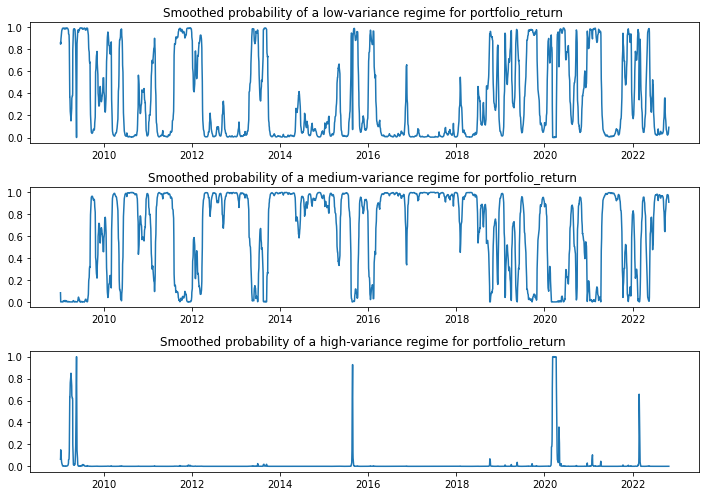

In [ ]:
mod_kns = sm.tsa.MarkovRegression(return_df2['portfolio_return'].dropna(), k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
print(res_kns.summary())
fig, axes = plt.subplots(3, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for {} '.format('portfolio_return'))#
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for {} '.format('portfolio_return'))#
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for {} '.format('portfolio_return'))
fig.tight_layout()

 **Exogenous shock analysis**

In [ ]:
!git init